In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from impyute.imputation.cs import mice
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier


In [2]:
#load data, remove gx features as they lack blazar properties altogether, select spectral slope columns and shuffle the data set
pd.set_option("display.max_rows", None, "display.max_columns", None)

%store -r CLASSED_SDSS_TRAIN
nogx = CLASSED_SDSS_TRAIN[(CLASSED_SDSS_TRAIN['cat']!='BLAZGX')]
spec_slop = nogx.iloc[: , -21:]
spec_slop_shuf = spec_slop.sample(frac=1)
print(len(spec_slop_shuf[(spec_slop_shuf['BLAZ']==1)]))
display(spec_slop_shuf)

276


,Log_g_Flux,Log_r_Flux,Log_i_Flux,Log_z_Flux,BLAZ,Classification,a_Rr,a_Rg,a_Ri,a_Rz,a_Ru,a_rg,a_ru,a_gu,a_ri,a_gi,a_rz,a_gz,a_iz,a_iu,a_zu
176,0.846900,0.854815,0.945826,0.943587,0,NON-BLAZAR,0.035878,0.036583,0.018709,0.019445,0.056339,0.068212,0.490730,0.870364,1.037966,0.485596,0.534437,0.342688,-0.028555,0.634879,0.508382
798,0.389812,0.741230,1.059128,1.246453,1,BLAZAR,-0.032040,0.034696,-0.094706,-0.133352,0.055759,3.028441,1.919778,0.923639,3.625574,3.285448,3.041620,3.036200,2.388706,2.369107,2.372844
160,0.701655,0.928465,1.217477,1.265117,0,NON-BLAZAR,-0.270742,-0.222217,-0.331853,-0.346471,-0.162653,1.954599,2.132134,2.291650,3.296137,2.532000,2.026760,1.997082,0.607479,2.438748,2.089578
19,1.233760,1.265601,1.369140,1.438692,1,BLAZAR,0.083258,0.087426,0.064453,0.051654,0.085907,0.274401,0.142148,0.023318,1.180844,0.664536,1.042068,0.726343,0.886904,0.415754,0.505589
243,0.794145,1.000348,1.129984,1.021033,0,NON-BLAZAR,-0.090929,-0.050197,-0.117818,-0.098031,-0.037136,1.777010,1.104920,0.501044,1.478480,1.648522,0.124535,0.804163,-1.389301,1.203321,0.708982
524,1.738017,1.921782,2.070785,2.184123,1,BLAZAR,0.012175,0.046442,-0.016731,-0.039482,0.083955,1.583641,1.607877,1.629653,1.699353,1.633444,1.579389,1.581138,1.445258,1.631973,1.596372
79,1.375500,1.518810,1.634433,1.732733,1,BLAZAR,0.028417,0.054727,0.006311,-0.013098,0.096182,1.235012,1.534870,1.804295,1.318671,1.271019,1.287896,1.266146,1.253487,1.477921,1.435128
284,1.853697,2.239201,2.419801,2.554843,1,BLAZAR,-0.317934,-0.238558,-0.358670,-0.391049,-0.123746,3.322183,3.998965,4.607058,2.059710,2.778812,1.900273,2.485075,1.722007,3.488139,3.151389
325,1.452596,1.685664,1.800312,1.994866,0,NON-BLAZAR,-0.033352,0.011173,-0.056325,-0.095809,0.024195,2.008522,1.245953,0.560781,1.307547,1.706821,1.861510,1.921973,2.480892,1.262177,1.494551
672,1.314621,1.864830,2.087301,2.191857,1,BLAZAR,-0.270859,-0.161559,-0.318970,-0.344682,-0.028287,4.741569,5.121641,5.463136,2.537242,3.792823,1.968820,3.109194,1.333272,4.440875,3.848344


In [3]:
df = spec_slop_shuf.drop(columns=['BLAZ','Classification'])
#df = spec_slop_shuf.drop(columns=['BLAZ','cat'])

imputed_df = mice(df.values)

normdf = preprocessing.normalize(imputed_df)
scaler = MinMaxScaler(feature_range=(0, 10))
scaleddf = scaler.fit_transform(normdf)
display(scaleddf)
df_blaz = spec_slop_shuf['BLAZ']
scaleddf.shape

array([[7.20654794, 6.88611539, 7.49457149, ..., 5.17085726, 7.42214245,
        7.26039466],
       [1.96990264, 1.9547988 , 2.46197381, ..., 6.91923961, 7.91213162,
        8.93249937],
       [2.89885223, 2.77227848, 3.35676311, ..., 5.74531369, 9.11767036,
        9.19869499],
       ...,
       [6.75101997, 6.81192073, 7.14459668, ..., 6.50893215, 7.14378995,
        7.94874451],
       [5.64364712, 5.71701918, 6.02745376, ..., 6.30350636, 8.22846942,
        8.7861309 ],
       [3.70862296, 3.64880756, 4.24214758, ..., 6.74226685, 7.72973624,
        8.64305193]])

(458, 19)

In [4]:
#sns.pairplot(df, height = 2)

In [5]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, plot_precision_recall_curve


x_train,x_test,y_train,y_test = train_test_split(scaleddf,df_blaz.values,random_state=0 ,train_size=0.85)


# univariate feature selction
## fitted to data and type 
### this is only valid for spectral slopes and need to remove mag diffs and log red shift and radio flux

In [6]:
sel = SelectKBest(f_classif, k=2)
sel.fit (x_train,y_train)
sel.transform(scaleddf).shape

(458, 2)

In [7]:
sel.scores_

array([2.36590953e-02, 8.36970541e-02, 4.61382592e-01, 1.59773547e+00,
       2.85143699e+01, 3.22622089e+01, 2.58812732e+01, 2.18647626e+01,
       3.24083152e+01, 9.50982589e+00, 5.29621429e+00, 4.12825258e-02,
       9.83599967e+00, 1.86561953e+01, 2.59975300e+01, 3.88083264e+01,
       1.56651086e+01, 1.31338932e+01, 2.86561249e+01])

# recursive model 
## 



In [33]:
min_features_to_select = 1
m = RFECV(RandomForestClassifier(), scoring='accuracy',cv=StratifiedKFold(3),min_features_to_select=min_features_to_select)
m.fit(x_train,y_train)
y_pred = m.predict(x_test)
#m.score(x_test,y_test)
acc_gnb_split = accuracy_score(y_test,y_pred)
acc_gnb_split


0.7971014492753623

In [34]:
# min_features_to_select = 1
# m = RFECV(RandomForestClassifier(), scoring='accuracy',cv=5,min_features_to_select=min_features_to_select)
# m.fit(scaleddf,df_blaz)
# y_pred = m.predict(scaleddf)
# #m.score(x_test,y_test)
# acc_gnb_split = accuracy_score(df_blaz.values,y_pred)
# acc_gnb_split


Optimal number of features : 19


c:\snek\python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


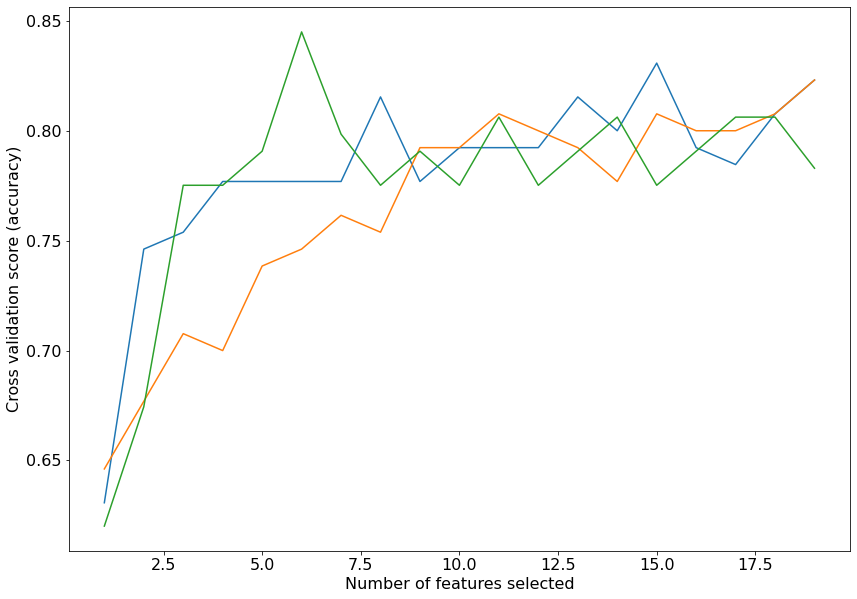

In [35]:
print("Optimal number of features : %d" % m.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(14, 10)) 
plt.rcParams.update({'font.size': 16})

plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(m.grid_scores_) + min_features_to_select),
    m.grid_scores_,
)
plt.show()

In [11]:
# mpred = m.predict(scaleddf)
# list4 = mpred.tolist()

# spec_slop['knc'] = list4
# m.score(scaleddf,df_blaz.values)

In [12]:
# spec_slop

In [13]:
# m2 = SelectFromModel(LinearSVC(C=0.01, dual = False))
# m2.fit(scaleddf,df_blaz.values)
# m2.transform(scaleddf).shape


In [14]:
min_features_to_select = 1
m3 = RFECV(LinearSVC(C=0.01, dual = False), scoring='accuracy',cv=StratifiedKFold(5),min_features_to_select=min_features_to_select)
m3.fit(x_train,y_train)
y_pred3 = m3.predict(x_test)
#m.score(x_test,y_test)
acc_gnb_split = accuracy_score(y_test,y_pred3)
acc_gnb_split

0.7536231884057971

Optimal number of features : 19


c:\snek\python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


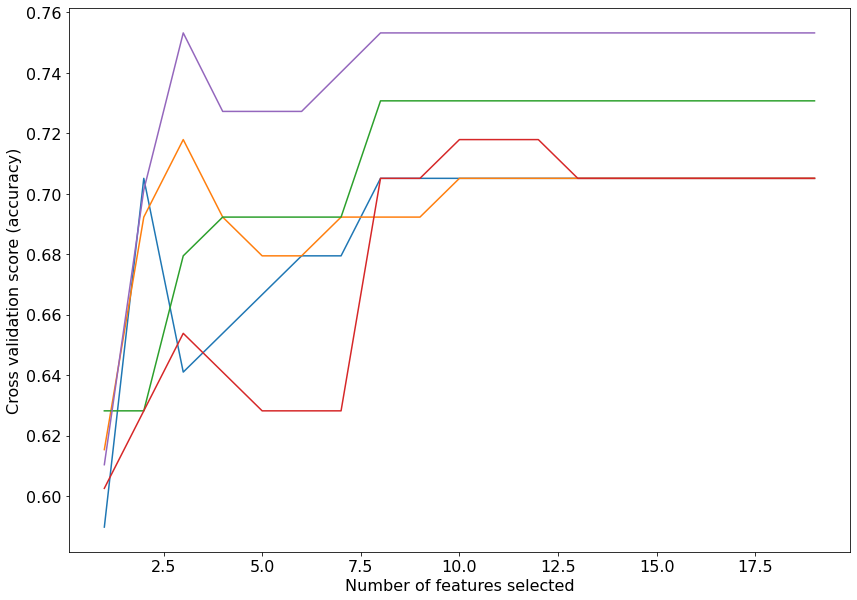

In [15]:
print("Optimal number of features : %d" % m.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(14, 10)) 
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(m3.grid_scores_) + min_features_to_select),
    m3.grid_scores_,
)
plt.show()

In [16]:
### both the above recursive method seem to suggest that 18 features are optimised from a list of 19. To find the importance of each feature and the corresponding statistical value I, Ks test and p values are considered


In [17]:
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
# # create pipeline
# rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=11)
# model = DecisionTreeClassifier()
# pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# # evaluate model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(pipeline, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [18]:
from scipy import stats
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

CLASSED_SDSS_TRAIN_CCO = CLASSED_SDSS_TRAIN.drop(columns=['ra','dec','type','class','run','rerun','camcol','objid','specobjid', 'cat','plate','mjd','fiberid','field','BLAZ','Classification'])
display(CLASSED_SDSS_TRAIN_CCO.head())

#final preselected data sets
target = CLASSED_SDSS_TRAIN['BLAZ']
%store target

mag_df = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['u','g','r','i','z','BLAZ'])
Flux_df = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['petroFlux_u','petroFlux_g','petroFlux_r','petroFlux_i','petroFlux_z','R_maggies','BLAZ'])
SpecSlopDf = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['Log_Redshift','Log_R_Flux','a_Rr','a_Rg','a_Ri','a_Rz','a_Ru','a_rg','a_ru','a_gu','a_ri','a_gi','a_rz','a_gz','a_iz','a_iu','a_zu'])    
scaler = MinMaxScaler(feature_range=(0,7))

#Scaled_data = scaler.fit_transform(SpecSlopDf)

imputed_data = mice(SpecSlopDf.values)
#normdata = preprocessing.normalize(imputed_data)
Scaled_data = scaler.fit_transform(imputed_data)

#print(imputed_data)

dx = pd.DataFrame(Scaled_data, columns = SpecSlopDf.columns)
#display(dx)
dx.std()

,u,g,r,i,z,petroFlux_u,petroFlux_g,petroFlux_r,petroFlux_i,petroFlux_z,redshift,peak,R_maggies,Log_R_Flux,Log_Redshift,u-g,g-z,r-i,g-i,Log_u_Flux,Log_g_Flux,Log_r_Flux,Log_i_Flux,Log_z_Flux,a_Rr,a_Rg,a_Ri,a_Rz,a_Ru,a_rg,a_ru,a_gu,a_ri,a_gi,a_rz,a_gz,a_iz,a_iu,a_zu
0,18.28582,18.18858,18.01644,17.96217,17.88329,46.070020,51.004710,59.93015,62.00322,67.37818,1.332958,62.13,17.110046,1.233251,0.124816,0.09724,0.30529,0.05427,0.22641,1.663418,1.707610,1.777645,1.792414,1.828519,-0.104582,-0.089140,-0.109259,-0.118124,-0.078921,0.603546,0.465878,0.342182,0.168437,0.416274,0.306279,0.428539,0.460399,0.387528,0.401422
1,21.12064,20.48794,19.87833,19.46459,19.10920,3.485241,6.428905,10.86615,16.35900,26.03238,5.153141,271.16,74.675039,1.873175,0.712072,0.63270,1.37874,0.41374,1.02335,0.542233,0.808137,1.036076,1.213757,1.415514,0.160812,0.200139,0.128849,0.090818,0.244181,1.964322,2.014151,2.058923,2.026423,1.991051,2.284351,2.152730,2.572738,2.017384,2.123274
3,17.23728,16.65306,16.19567,15.85146,15.56400,122.554700,209.925900,320.38810,435.24300,573.18370,0.003382,250.98,69.117647,1.839589,-2.470807,0.58422,1.08906,0.34421,0.80160,2.088330,2.322066,2.505676,2.638732,2.758294,-0.127960,-0.090666,-0.156151,-0.182307,-0.045635,1.582311,1.702158,1.809842,1.517475,1.554405,1.520846,1.546125,1.524614,1.653510,1.628934
4,19.18801,18.69809,18.26784,17.96803,17.68000,20.288140,31.331820,46.90593,61.68103,81.41004,1.406709,70.05,19.291143,1.285358,0.148204,0.48992,1.01809,0.29981,0.73006,1.307242,1.495986,1.671228,1.790152,1.910678,-0.074128,-0.039581,-0.098636,-0.124088,-0.004015,1.510195,1.484525,1.461459,1.356307,1.443962,1.441574,1.469797,1.536911,1.450750,1.467179
5,19.36534,18.94394,18.62410,18.45460,18.21095,17.571520,25.539310,34.07517,39.24296,50.78510,0.844779,62.69,17.264265,1.237148,-0.073257,0.42140,0.73299,0.16950,0.48934,1.244809,1.407209,1.532438,1.593762,1.705736,-0.056727,-0.031957,-0.069682,-0.092986,-0.001406,1.079193,1.173101,1.257478,0.699387,0.915724,1.043317,1.058072,1.427862,1.048319,1.120686


Stored 'target' (Series)


Log_Redshift    0.765950
Log_R_Flux      1.361222
a_Rr            1.094073
a_Rg            0.850592
a_Ri            1.113457
a_Rz            1.097931
a_Ru            0.712916
a_rg            0.556731
a_ru            0.441655
a_gu            0.337486
a_ri            0.867867
a_gi            0.645685
a_rz            0.788056
a_gz            0.672232
a_iz            0.646905
a_iu            0.467529
a_zu            0.488483
dtype: float64

a_Rr            1.097022
a_Rg            0.851141
a_Ri            1.113712
a_Rz            1.096622
a_Ru            0.713054
a_rg            0.556731
a_ru            0.440892
a_gu            0.334905
a_ri            0.620351
a_gi            0.642867
a_rz            0.793871
a_gz            0.666740
a_iz            0.646657
a_iu            0.467700
a_zu            0.488465


In [19]:
#this algorith will fail for nan values, using imputation methods to fix this, 

for column in dx:
    ks = stats.kstest(dx[column],'norm')
    print(ks,dx[column].name)
    


KstestResult(statistic=0.9799939341110513, pvalue=0.0) Log_Redshift
KstestResult(statistic=0.7021308419748744, pvalue=1.4837941544843816e-232) Log_R_Flux
KstestResult(statistic=0.960638225861831, pvalue=0.0) a_Rr
KstestResult(statistic=0.9136963172691996, pvalue=0.0) a_Rg
KstestResult(statistic=0.9628026353598986, pvalue=0.0) a_Ri
KstestResult(statistic=0.9592653600951514, pvalue=0.0) a_Rz
KstestResult(statistic=0.8016720308080034, pvalue=0.0) a_Ru
KstestResult(statistic=0.5204557114566474, pvalue=1.0418732625885733e-118) a_rg
KstestResult(statistic=0.6866561302076624, pvalue=1.4910965392991429e-220) a_ru
KstestResult(statistic=0.9239742808903226, pvalue=0.0) a_gu
KstestResult(statistic=0.953177556987972, pvalue=0.0) a_ri
KstestResult(statistic=0.5680702755188196, pvalue=1.5387061361711762e-143) a_gi
KstestResult(statistic=0.8827270524500324, pvalue=0.0) a_rz
KstestResult(statistic=0.6317646839194626, pvalue=6.724980084517374e-182) a_gz
KstestResult(statistic=0.9542003119222575, pvalue

In [20]:

for i,column in  zip(range (0,16,1), dx):
    ks = stats.ks_2samp(dx.iloc[:, i],dx.iloc[:, i+1])
    print(ks,dx.iloc[:, i].name,'_',dx.iloc[:, i+1].name)
  # df.iloc[:, i]

KstestResult(statistic=0.906183368869936, pvalue=2.670336404025627e-205) Log_Redshift _ Log_R_Flux
KstestResult(statistic=0.4861407249466951, pvalue=1.319176901394474e-50) Log_R_Flux _ a_Rr
KstestResult(statistic=0.4562899786780384, pvalue=2.161332861218004e-44) a_Rr _ a_Rg
KstestResult(statistic=0.4690831556503198, pvalue=5.350509748060027e-47) a_Rg _ a_Ri
KstestResult(statistic=0.06823027718550106, pvalue=0.22514917382149183) a_Ri _ a_Rz
KstestResult(statistic=0.7526652452025586, pvalue=3.4729773133368825e-130) a_Rz _ a_Ru
KstestResult(statistic=0.7825159914712153, pvalue=1.678869153569036e-142) a_Ru _ a_rg
KstestResult(statistic=0.5159914712153518, pvalue=2.698794855256547e-57) a_rg _ a_ru
KstestResult(statistic=0.9253731343283582, pvalue=1.7910659216865173e-217) a_ru _ a_gu
KstestResult(statistic=0.8805970149253731, pvalue=2.416275420854732e-190) a_gu _ a_ri
KstestResult(statistic=0.9275053304904051, pvalue=6.934436643697799e-219) a_ri _ a_gi
KstestResult(statistic=0.76759061833688

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

feature_names = np.array(dx.columns)

model  = ExtraTreesClassifier()
model.fit(scaleddf,df_blaz)
print(model.feature_importances_)

[0.03943537 0.04003205 0.03782082 0.04130097 0.04742732 0.05288076
 0.04823979 0.04891962 0.04713665 0.06532491 0.04884382 0.05373259
 0.06270645 0.05783277 0.05761163 0.06454758 0.08379118 0.04851986
 0.05389585]


In [22]:
#sns.pairplot(dx, height = 2)

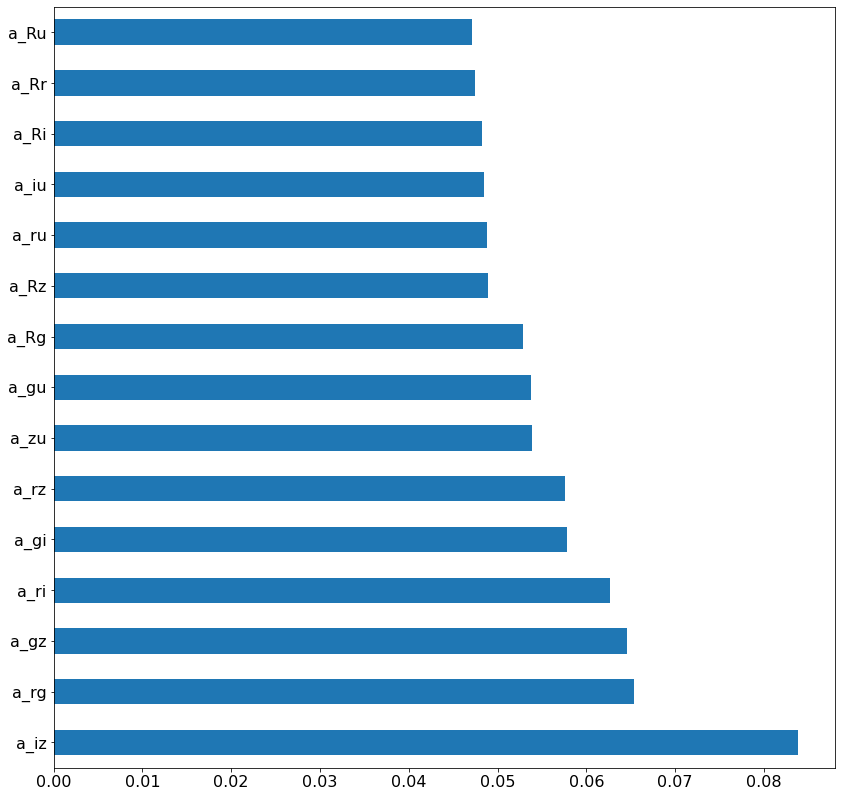

In [23]:
fig2 = plt.figure(figsize=(14,14))
feature_importances = pd.Series(model.feature_importances_,index = df.columns)
feature_importances.nlargest(15).plot(kind='barh')
plt.show()

# Results of KS and P-value and feature importance tests
## spectral slopes that are below statistical significance of 0.7 are dropped and any p value near 0 rejects null Hyp
### a_gz,a_gi,a_rg are dropped 
### the remainder of the spectral slopes are somewhat  consistent with each other. 



In [24]:

SpecSlopDf_final = pd.DataFrame(dx,columns=['Log_R_Flux','a_Rr','a_Rg','a_Ri','a_Rz','a_Ru','a_ru','a_gu','a_ri','a_rz','a_iz','a_iu','a_zu'])                  
#SpecSlopDf_final = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['Log_R_Flux','a_Rr','a_Rg','a_Ri','a_Rz','a_Ru','a_ru','a_gu','a_ri','a_rz','a_iz','a_iu','a_zu','BLAZ'])                  

In [25]:
#sns.pairplot(mag_df, height = 2, hue='BLAZ')
#sns.pairplot(SpecSlopDf_final,height = 2,hue='BLAZ')
%store SpecSlopDf_final
SpecSlopDf_final

Stored 'SpecSlopDf_final' (DataFrame)


,Log_R_Flux,a_Rr,a_Rg,a_Ri,a_Rz,a_Ru,a_ru,a_gu,a_ri,a_rz,a_iz,a_iu,a_zu
0,3.002445,3.945033,2.761385,4.171128,4.167204,1.703955,0.653245,1.815137,2.506741,1.860174,2.929592,0.442108,0.369563
1,4.079005,5.772205,4.354810,5.780523,5.533508,3.176425,1.026077,1.999395,3.877284,3.506340,4.012025,0.954319,1.032689
2,4.022502,3.784081,2.752982,3.854184,3.747506,1.855647,0.950948,1.972661,3.501858,2.870946,3.474931,0.839965,0.842307
3,3.090106,4.154699,3.034372,4.242935,4.128208,2.045322,0.898541,1.935269,3.382973,2.804975,3.481233,0.776244,0.780011
4,3.009001,4.274500,3.076363,4.438638,4.331587,2.057214,0.823548,1.913376,2.898396,2.473542,3.425352,0.649773,0.646569
5,5.122993,5.241797,3.751365,5.475419,5.481160,2.511847,0.639296,1.823318,2.446963,1.699212,2.766093,0.421990,0.326180
6,3.354041,4.611485,3.390519,4.681542,4.527569,2.303181,0.862238,1.905628,3.494604,2.993381,3.640248,0.753875,0.780612
7,4.556693,6.282107,4.628382,6.340732,6.278692,3.315865,0.811232,1.918346,3.552184,2.560711,3.031228,0.711304,0.651117
8,4.332357,5.378925,3.952922,5.474844,5.355920,2.752633,0.820308,1.900826,3.322863,2.702225,3.393912,0.694294,0.686219
9,3.587721,4.898875,3.662599,4.928299,4.712785,2.570466,0.962796,1.952853,3.750813,3.366922,3.928425,0.879294,0.946299


In [26]:
# df = pd.melt(SpecSlopDf_final, SpecSlopDf_final.columns[-1], SpecSlopDf_final.columns[:-1])
# g = sns.FacetGrid(df, col="variable", hue="BLAZ", col_wrap=4,height=4)
# g.map(sns.kdeplot, "value", shade=True)
# g.set_titles("{col_name}")  # use this argument literally
# g.set_axis_labels(x_var='Spectral slope', y_var="density")
# plt.show()